# Analysis of Rental Bikes regarding of Weather and Time
#### Student Info
Name: Markus Garmeister

Enrollment No.: 18.03.027

In this Project I'm going to analyse the dataset 'Capital Bike Share' from https://www.kaggle.com/datasets/vivianyfwang/capital-bike-share-2018-20218.

## Research Questions
I'm interested in how weather and time influence people to rent a bike. Here are the questions I would like to base my analysis on:

1. What kind of weather conditions (e.g., temperature, humidity) affect bike rentals?  
2. Is there a specific time pattern where bike rentals are higher (e.g., time of day, week, or month)?  
3. What are the time and weather conditions during rental peaks?   

---

## Dataset
The dataset consists of various weather and time-related conditions (e.g., temperature, holiday, wind speed, etc.). Each entry represents one hour, and the dataset spans from **2018 to August 2021**.

- **Total columns:** 16  
- **Index:** 'datetime'  
- **Total rows:** 33,379  
- **Data types:**  
  - Mostly floats or integers.  
  - One categorical column: **'weather_main'**, which includes the following values:  
    - ['Clouds', 'Clear', 'Snow', 'Mist', 'Rain', 'Fog', 'Drizzle', 'Haze', 'Thunderstorm', 'Smoke', 'Squall']  

---

### Imports

In [901]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

In [903]:
df = pd.read_csv('capitalbikeshare-complete.csv', index_col=0, sep=',')

### Inspect Data Frame

In [906]:
df.shape

(33379, 15)

The dataframe consists of 33379 rows and 16 columns. Since I chose the datetime column as index, the shape attribute doesn't count the index as column and therefore it prints 15 columns.

In [909]:
df.head(3)

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
datetime,,,,,,,,,,,,,,,
2018-01-01 00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,NaN,NaN,20,Clouds
2018-01-01 01:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,NaN,NaN,1,Clear
2018-01-01 02:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,NaN,NaN,1,Clear


The head methode shows by default the first 5 rows, but you can also decide how many rows should be shown by inserting a number. The tails methode is the opposite of head and shows the last rows.

In [912]:
df.dtypes

count             int64
holiday           int64
workingday        int64
temp            float64
feels_like      float64
temp_min        float64
temp_max        float64
pressure          int64
humidity          int64
wind_speed      float64
wind_deg          int64
rain_1h         float64
snow_1h         float64
clouds_all        int64
weather_main     object
dtype: object

With the dtypes attribute you get an overview of the datatype of each column. In our dataset we have mainly intergers and floats. Only the weather_main column consits of the type object.

In [915]:
weather_main_values = df["weather_main"].unique()
weather_main_values

array(['Clouds', 'Clear', 'Snow', 'Mist', 'Rain', 'Fog', 'Drizzle',
       'Haze', 'Thunderstorm', 'Smoke', 'Squall'], dtype=object)

I used the unique methode, in order to identify all the values what the weather_main column could be. 

In [918]:
df.isnull().sum()

count               0
holiday             0
workingday          0
temp                0
feels_like          0
temp_min            0
temp_max            0
pressure            0
humidity            0
wind_speed          0
wind_deg            0
rain_1h         26608
snow_1h         33053
clouds_all          0
weather_main        0
dtype: int64

The isnull() methode checks every cell if its empty. For a empty cell it returns True and for a cell with a value it returns False. In addition I used the sum() methode to get a better overview of which columns have empty cells and how many. The sum() works well here because True = 1 and False = 0.

In [921]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33379 entries, 2018-01-01 00:00 to 2021-08-31 23:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   count         33379 non-null  int64  
 1   holiday       33379 non-null  int64  
 2   workingday    33379 non-null  int64  
 3   temp          33379 non-null  float64
 4   feels_like    33379 non-null  float64
 5   temp_min      33379 non-null  float64
 6   temp_max      33379 non-null  float64
 7   pressure      33379 non-null  int64  
 8   humidity      33379 non-null  int64  
 9   wind_speed    33379 non-null  float64
 10  wind_deg      33379 non-null  int64  
 11  rain_1h       6771 non-null   float64
 12  snow_1h       326 non-null    float64
 13  clouds_all    33379 non-null  int64  
 14  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(1)
memory usage: 4.1+ MB


The info() methode is a quite handy one, because it gives you alot of information at once. You could say it is a combination of the shape and dtypes attribute and the isnull().sum() and head() methode. Of course its not the same but you kind of get similar results.

##### Checking for Duplicates

In [925]:
duplicates_in_index = df.index.duplicated()
duplicates_in_index.any()

True

In [927]:
duplicate_index_rows = df[duplicates_in_index]
duplicate_index_rows

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
datetime,,,,,,,,,,,,,,,
2018-01-04 05:00,22,0,1,-3.02,-3.02,-3.56,-2.94,1014,85,1.00,50,NaN,0.16,90,Mist
2018-01-04 06:00,46,0,1,-3.35,-7.62,-4.16,-2.94,1013,85,3.10,360,NaN,0.21,90,Mist
2018-01-04 07:00,87,0,1,-3.47,-7.25,-4.56,-3.15,1012,86,2.60,360,NaN,1.31,90,Mist
2018-01-12 11:00,186,0,1,14.93,15.09,14.85,16.97,1013,100,6.70,170,NaN,NaN,90,Rain
2018-01-12 12:00,268,0,1,14.27,14.36,13.85,17.24,1012,100,2.10,170,NaN,NaN,90,Mist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20 12:00,337,0,1,22.62,23.42,21.92,23.10,1011,95,0.89,49,13.01,NaN,90,Mist
2021-08-20 13:00,421,0,1,22.19,22.95,21.60,23.16,1011,95,0.45,1,20.78,NaN,90,Mist
2021-08-20 14:00,522,0,1,22.04,22.78,21.40,22.96,1011,95,0.45,58,5.21,NaN,90,Rain


The DataFrame 'duplicate_index_rows' shows me the rows, which appear in the dataset more than one time.

In [930]:
df.index = pd.to_datetime(df.index)
df.loc["2018-01-04 05:00"]

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
datetime,,,,,,,,,,,,,,,
2018-01-04 05:00:00,22,0,1,-3.02,-3.02,-3.56,-2.94,1014,85,1.0,50,NaN,0.16,90,Snow
2018-01-04 05:00:00,22,0,1,-3.02,-3.02,-3.56,-2.94,1014,85,1.0,50,NaN,0.16,90,Mist


I selected a few different rows, in order to see what values are the same or different. It seems like that the only column['weather_main'] differs for each duplicate. 

### Data Wrangle

After insepcting the dataset, I decided to fill the missing values in the rows 'rain_1h' and 'snow_1h' with 0. Since an empty cell means there was no rain or snow, a 0 has the same meaning. After checking for duplicates, I relaized that there are 1963 rows with duplicates for the same hour. I inspected some of them and relazied that only the 'weather_main' differs. Therefore I decided to take the first entry of every duplicate for my dataset. I also will add 3 more columns: 'days', 'month' and 'year'.

In [935]:
df['rain_1h'] = df['rain_1h'].fillna(0)

In [937]:
df['snow_1h'] = df['snow_1h'].fillna(0)

In [938]:
df.isnull().sum() #check up if it worked

count           0
holiday         0
workingday      0
temp            0
feels_like      0
temp_min        0
temp_max        0
pressure        0
humidity        0
wind_speed      0
wind_deg        0
rain_1h         0
snow_1h         0
clouds_all      0
weather_main    0
dtype: int64

In [939]:
# dropping the duplicates but ignoring the 'weather_main' column, since this differs in value.
# keeping the first entry for each duplicate
df = df.drop_duplicates(subset=df.columns.difference(['weather_main']), keep='first')
df.shape

(31416, 15)

In [940]:
# check up if the duplicates are gone
df.loc["2018-01-04 05:00"] 

count             22
holiday            0
workingday         1
temp           -3.02
feels_like     -3.02
temp_min       -3.56
temp_max       -2.94
pressure        1014
humidity          85
wind_speed       1.0
wind_deg          50
rain_1h          0.0
snow_1h         0.16
clouds_all        90
weather_main    Snow
Name: 2018-01-04 05:00:00, dtype: object

In [941]:
# adding ['day'], ['month'], ['year'] column 
df['day'] = pd.DatetimeIndex(df.index).day_name()
df['month'] = pd.DatetimeIndex(df.index).month_name()
df['year'] = pd.DatetimeIndex(df.index).year
df.head()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,day,month,year
datetime,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,Monday,January,2018
2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,Monday,January,2018
2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,Monday,January,2018
2018-01-01 03:00:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear,Monday,January,2018
2018-01-01 04:00:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear,Monday,January,2018


### Outliers

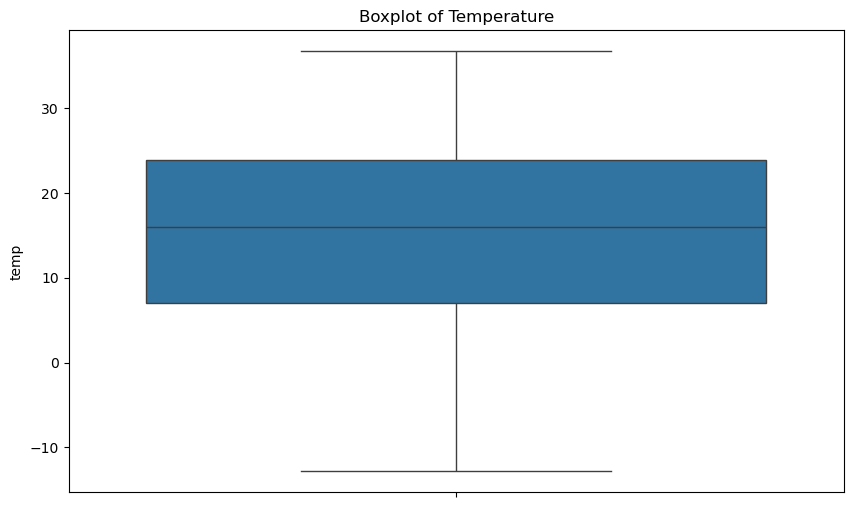

In [943]:
# checking for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['temp'])
plt.title("Boxplot of Temperature")
plt.show()


For the temperature there is no sign of an outlier value.

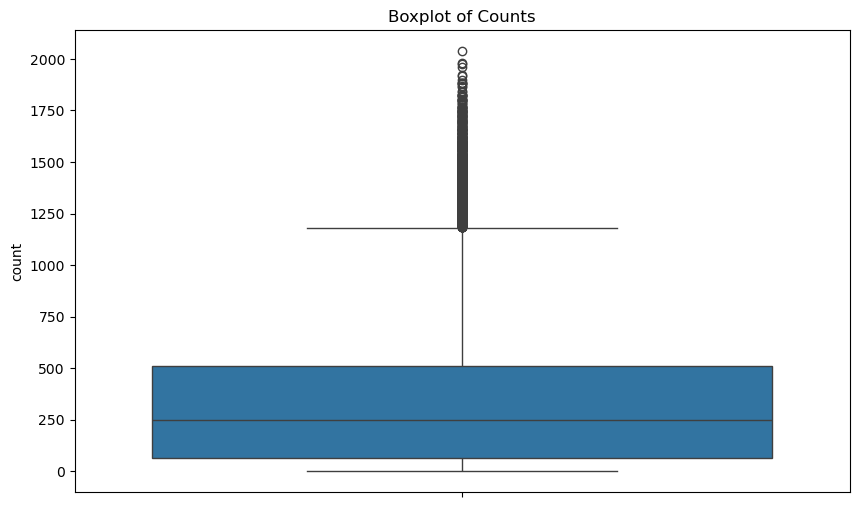

In [950]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['count'])
plt.title("Boxplot of Counts")
plt.show()

The counts has quite few outliers. It would be intreseting to identify them, in order to see similiarities, which could give us some conclusion about what leads to high bike rentals.

In [953]:
# identifying the upper whisker line
# everything above the upper whisker is considered an outlier

q1_count = df['count'].quantile(0.25)
q3_count = df['count'].quantile(0.75)
iqr_count = q3_count - q1_count
upper_whisker_count = q3_count + 1.5 * iqr_count
upper_whisker_count


1182.0

In [954]:
# selecting all outliers for counts
df_count_outliers = df[df['count'] > upper_whisker_count]
df_witout_outliers = df[df['count'] < upper_whisker_count]
df_count_outliers.describe()
# df_witout_outliers.describe()



,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,year
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.0,909.000000,909.000000
mean,1411.341034,0.004400,0.816282,22.097415,22.360858,20.443696,22.972387,1017.179318,61.019802,2.490055,182.730473,0.049450,0.0,58.154015,2018.550055
std,169.057560,0.066226,0.387468,6.748962,7.850852,7.060262,6.809279,6.055522,17.760758,1.907395,107.004544,0.268484,0.0,29.745700,0.646042
min,1183.000000,0.000000,0.000000,3.180000,0.640000,-1.860000,4.800000,1000.000000,17.000000,0.000000,0.000000,0.000000,0.0,1.000000,2018.000000
25%,1277.000000,0.000000,1.000000,17.990000,17.290000,15.970000,18.850000,1013.000000,47.000000,0.890000,110.000000,0.000000,0.0,40.000000,2018.000000
50%,1376.000000,0.000000,1.000000,22.990000,23.140000,21.120000,23.810000,1017.000000,60.000000,2.060000,180.000000,0.000000,0.0,75.000000,2018.000000
75%,1519.000000,0.000000,1.000000,26.950000,27.600000,25.740000,27.850000,1021.000000,77.000000,3.600000,280.000000,0.000000,0.0,90.000000,2019.000000
max,2038.000000,1.000000,1.000000,35.670000,42.300000,33.850000,36.690000,1039.000000,95.000000,9.260000,360.000000,5.000000,0.0,90.000000,2021.000000


If you compare the two datasets you can already see that the mean for temperature is higher for the outliers. This could indicate that higher temperatur leads to more bike rentals.

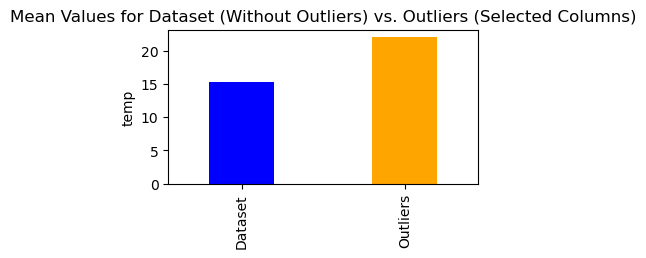

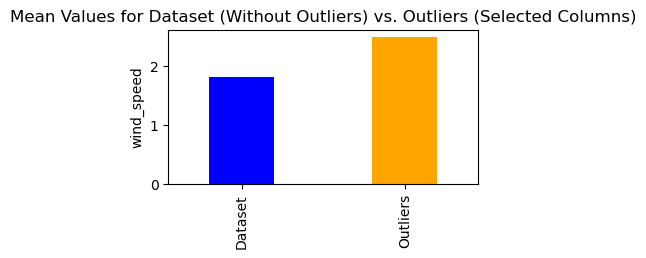

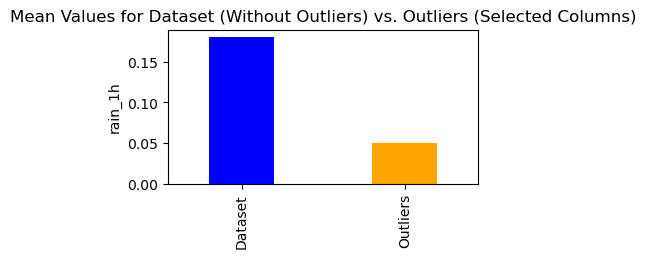

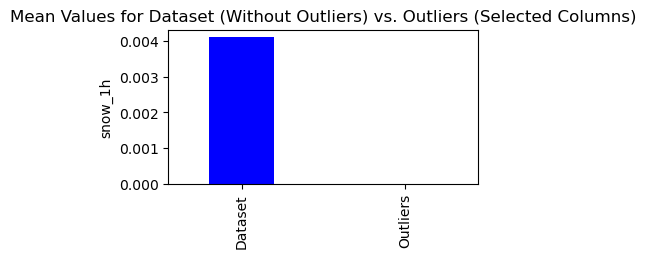

In [958]:
# comparing means outliers vs dataset without outliers 

means_columns = ['temp', 'wind_speed', 'rain_1h', 'snow_1h']
all_means = df_witout_outliers[means_columns].mean()
outliers_means = df_count_outliers[means_columns].mean()
df_means = pd.DataFrame({'Dataset': all_means, 'Outliers': outliers_means})

for column in means_columns:
    plt.figure(figsize=(4, 2))
    df_means.loc[column].plot(kind='bar', width=0.4, color=['blue', 'orange'])
    plt.title('Mean Values for Dataset (Without Outliers) vs. Outliers (Selected Columns)')
    plt.ylabel(column)
    plt.show()

It shows that there is some correlation between higher temperature and higher rental counts. Also less rain and snow are indicating higher rental counts. However this gives us only insights about outliers and making general statemants would be dangerous. It could also be a coincident, but I thought in this case it would be interesting to see if outliers have similarities in certain weather conditions. 

### Categorical Values

In our dataset we have six columns with categorical values: 'holiday', 'workingday', 'weather_main', 'day', 'month', 'year'. Let's inspect those columns and discover, if a certain day or time has an influence on renting a bike.

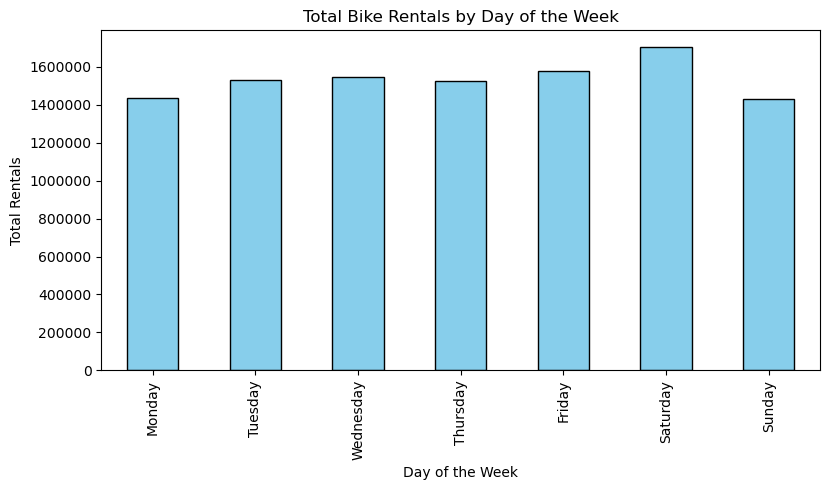

In [962]:
# plotting rental counts by day
rentals_per_day = df.groupby('day')['count'].sum()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rentals_per_day = rentals_per_day.reindex(ordered_days)

plt.figure(figsize=(8, 5))
rentals_per_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

It seems like it's evenly distributed. Saturday is the day with the most counts and sunday with the lowest. Looking into the mean gives us the same result, because every day appears nearly the same amount.

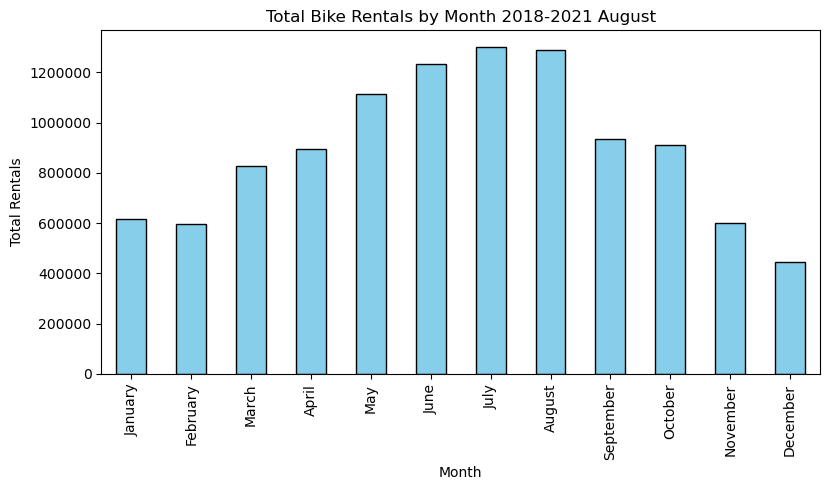

In [965]:
# plotting rental counts by months all data
rentals_per_month = df.groupby('month')['count'].sum()
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
rentals_per_month = rentals_per_month.reindex(ordered_months)

plt.figure(figsize=(8, 5))
rentals_per_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Bike Rentals by Month 2018-2021 August')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

This plot seems to be normally distributed. However this dataset is missing the values for the last 4 months in 2021. Making assumptions here could lead to false conclusion. On the other hand you can see a trend for warmer months.

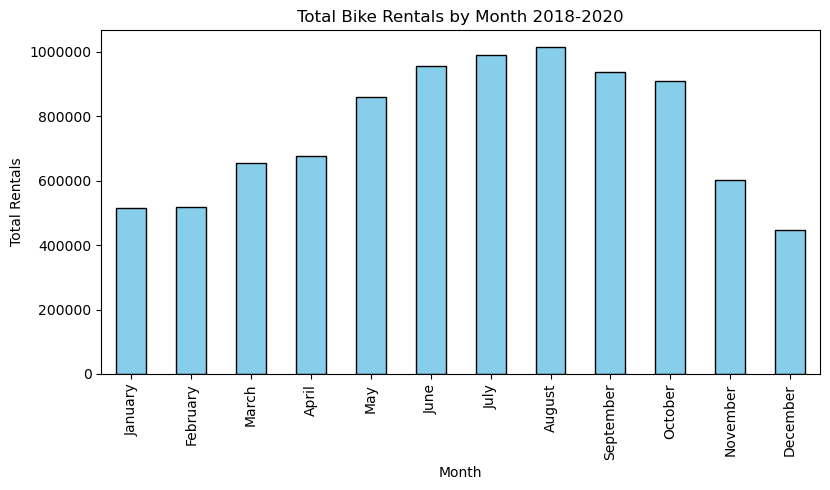

In [968]:
# plotting rental counts by months from 2018 - 2020
df_without_2021 = df[df['year'] != 2021]
rentals_per_month_without2021 = df_without_2021.groupby('month')['count'].sum()
rentals_per_month_without2021 = rentals_per_month_without2021.reindex(ordered_months)

plt.figure(figsize=(8, 5))
rentals_per_month_without2021.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Bike Rentals by Month 2018-2020')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

This plot gives us complete data for all months and therefore I can be more confident in making assumptions. All in all it shows that people tend to rent a bike in the summer and fall more often.

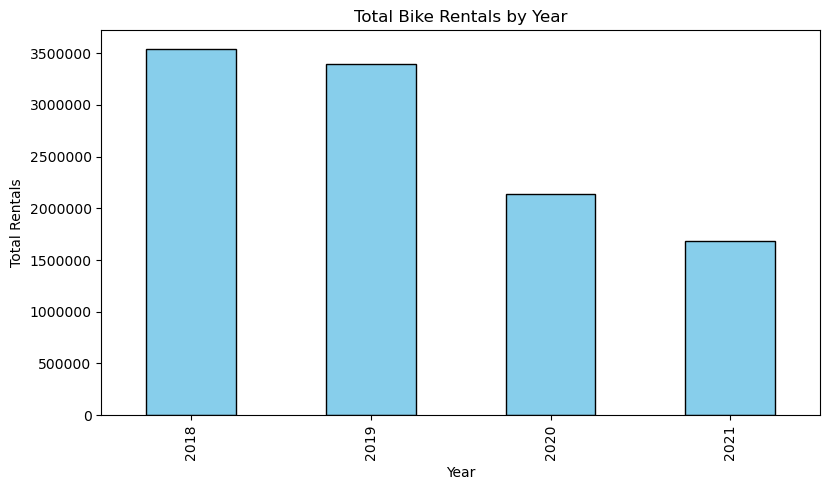

In [971]:
# plotting rental counts by year
rentals_per_year = df.groupby('year')['count'].sum()

plt.figure(figsize=(8, 5))
rentals_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

You can see a decline in bike rentals over the years. My explanation for this would be the COVID-19 pandemic. It would be interesting, to discover the data for bike rentals for 2023 and this year, in order to see if the pandamic caused this descending trend. We also need to consider that the data for 2021 is missing 4 months. Therefore I wouldn't make a statement about the trend for bike rentals.  

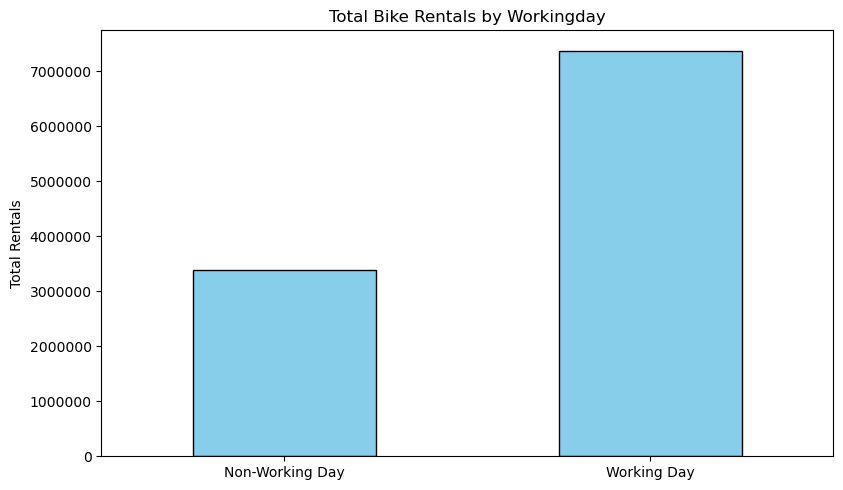

In [974]:
# comparing rentals for workingday vs weekend + holiday
rentals_per_workingday = df.groupby('workingday')['count'].sum()
plt.figure(figsize=(8, 5))
rentals_per_workingday.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Bike Rentals by Workingday')
plt.xlabel('')
plt.ylabel('Total Rentals')
plt.xticks(ticks=[0,1], labels=['Non-Working Day', 'Working Day'], rotation=0)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

From this plot it looks like people tend to rent bikes more often on workingdays. However we need to consider that there are much more workingdays then non-working days.

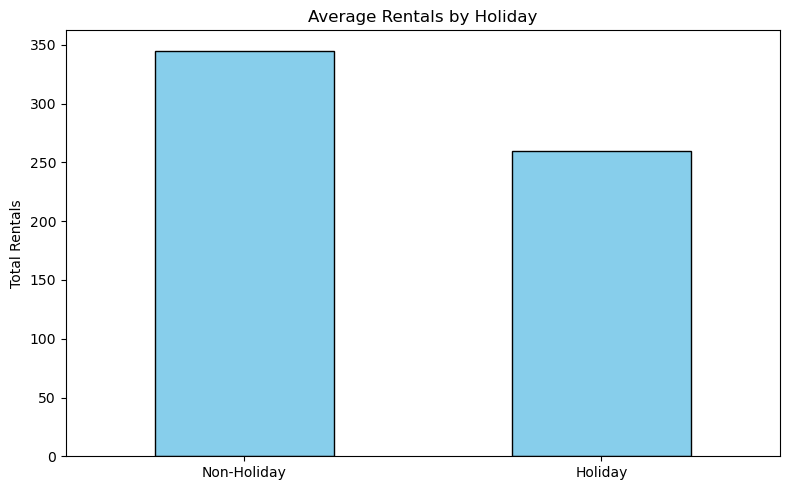

In [976]:
# comparing holidays and workingdays by average rentals
# rentals_per_holiday = df.groupby('holiday')['count'].sum()
rentals_per_holiday = df.groupby('holiday')['count'].mean()
plt.figure(figsize=(8, 5))
rentals_per_holiday.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Rentals by Holiday')
plt.xlabel('')
plt.ylabel('Total Rentals')
plt.xticks(ticks=[0,1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

Since there are more working days than holidays. it doesn't makes to much sense to compare by total rentals. Therefore I used the mean to see if there is a difference. It looks like that on holidays people don't rent bikes as much.

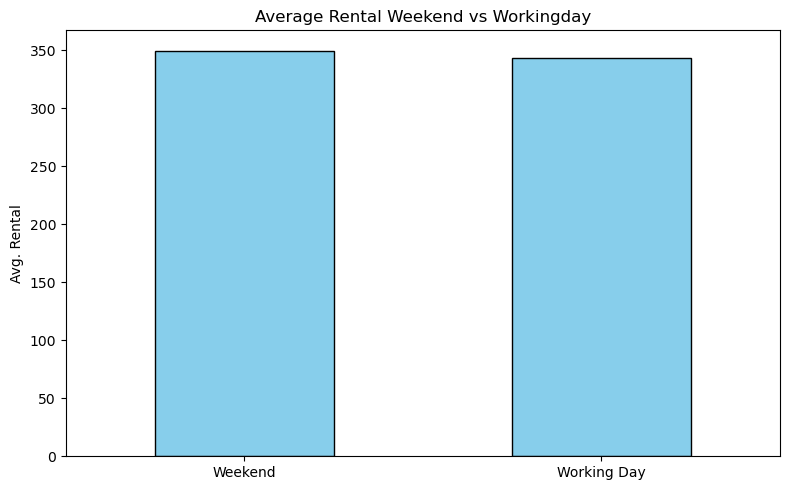

In [979]:
# comparing mean of weekend and workingday
df_without_holiday = df[df['holiday'] == 0]
weekend_vs_workingday = df_without_holiday.groupby('workingday')['count'].mean()
plt.figure(figsize=(8, 5))
weekend_vs_workingday.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Rental Weekend vs Workingday')
plt.xlabel('')
plt.ylabel('Avg. Rental')
plt.xticks(ticks=[0,1], labels=['Weekend', 'Working Day'], rotation=0)
plt.tight_layout()
plt.show()

This plot shows that there is no difference in bike rentals, whether it's a weekend day or a working day.

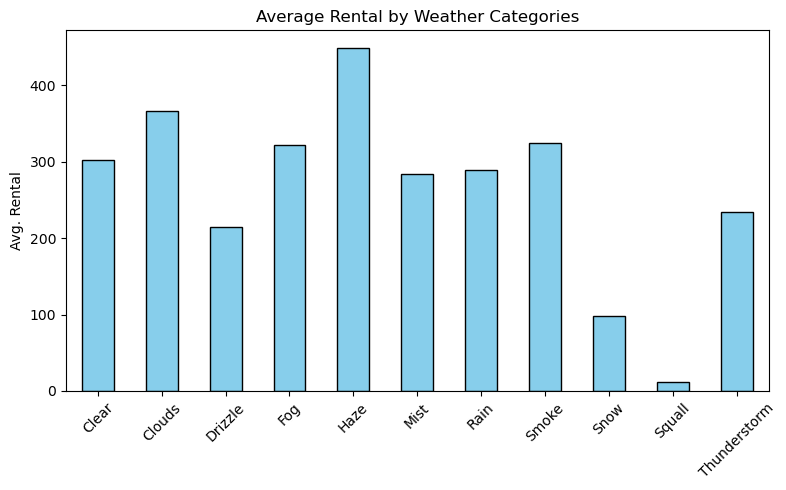

In [982]:
# inspecting the weather categories by mean 
weather_type = df.groupby('weather_main')['count'].mean()
plt.figure(figsize=(8, 5))
weather_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Rental by Weather Categories')
plt.xlabel('')
plt.ylabel('Avg. Rental')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

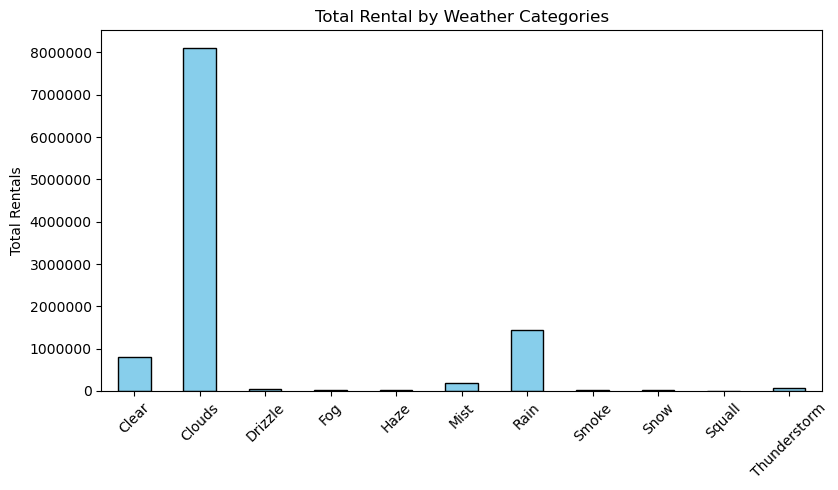

In [983]:
# inspecting the weather categories by mean 
weather_type = df.groupby('weather_main')['count'].sum()
plt.figure(figsize=(8, 5))
weather_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Rental by Weather Categories')
plt.xlabel('')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

I find these two plots interesting because I didn't expect the total rentals to be so high during rainy weather. Additionally, I would have expected clouds or clear weather to have the highest mean. Also, I noticed the absence of the category 'sun', maybe it is included under 'clear,' but I am not sure. Overall, the plots suggest that dry weather is an indicator of higher rentals. However, I don't find these plots significant enough to draw clear conclusions. 

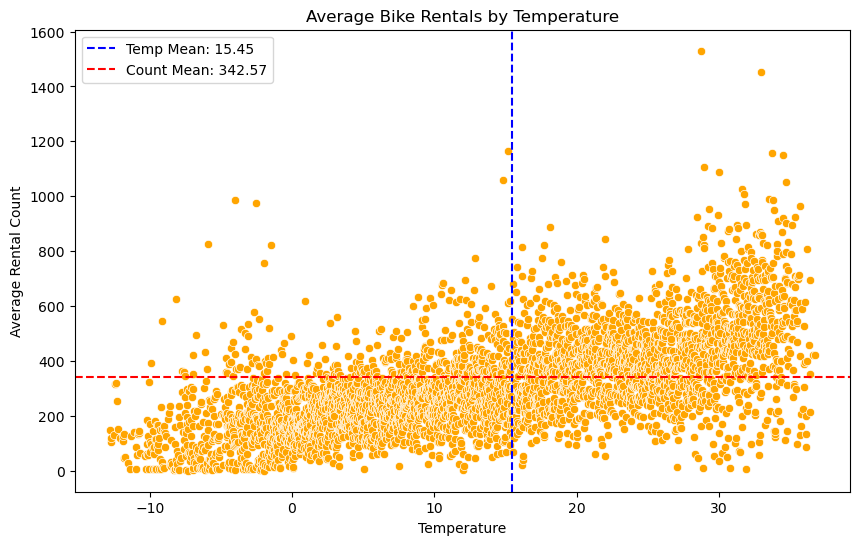

In [986]:
# plot temperature and calculate the average rental count
temp_rentals = df.groupby('temp')['count'].mean().reset_index()
temp_mean = df['temp'].mean()
count_mean = df['count'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count',color='orange', data=temp_rentals)
plt.xlabel("Temperature")
plt.ylabel("Average Rental Count")
plt.title("Average Bike Rentals by Temperature")
plt.axvline(temp_mean, color='blue', linestyle='--', label=f'Temp Mean: {temp_mean:.2f}')
plt.axhline(count_mean, color='red', linestyle='--', label=f'Count Mean: {count_mean:.2f}')
plt.legend()
plt.show()

From this plot, it looks to me that there is a correlation between higher temperature and higher rentals. Maybe a Linear Regression line gives more visual input to take this conclusion.

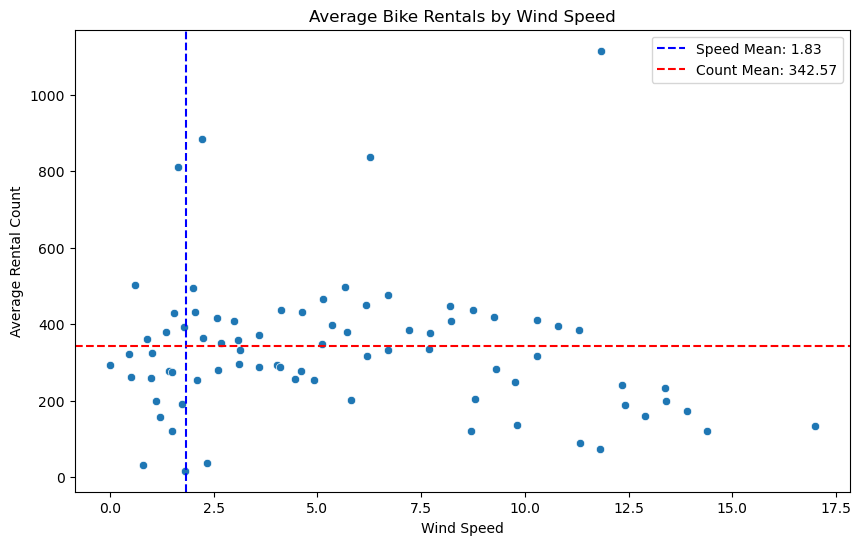

In [989]:
wind_rentals = df.groupby('wind_speed')['count'].mean().reset_index()
wind_mean = df['wind_speed'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='count', data=wind_rentals)
plt.xlabel("Wind Speed")
plt.ylabel("Average Rental Count")
plt.title("Average Bike Rentals by Wind Speed")
plt.axvline(wind_mean, color='blue', linestyle='--', label=f'Speed Mean: {wind_mean:.2f}')
plt.axhline(count_mean, color='red', linestyle='--', label=f'Count Mean: {count_mean:.2f}')
plt.legend()
plt.show()


It is harder to see a trend here. My conclusion is that wind speed might not be a significant indicator for bike rentals.

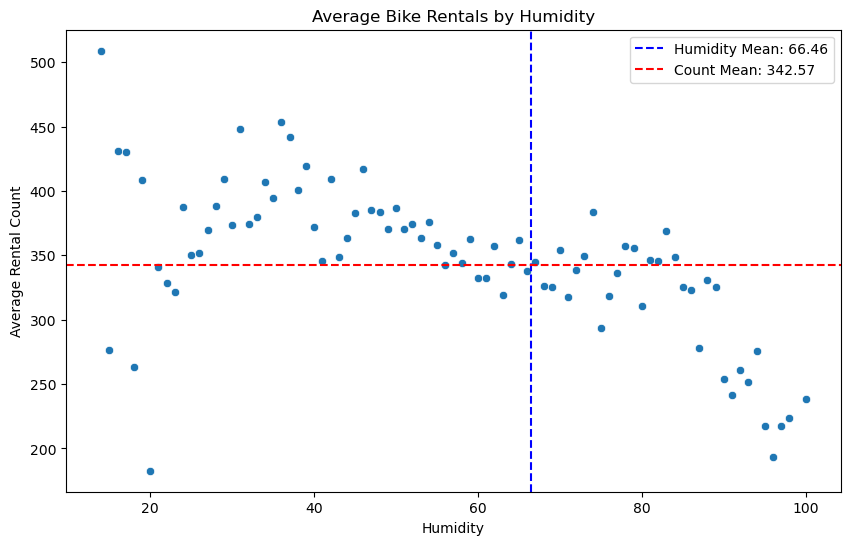

In [992]:
humidity_rentals = df.groupby('humidity')['count'].mean().reset_index()
humidity_mean = df['humidity'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='count', data=humidity_rentals)
plt.xlabel("Humidity")
plt.ylabel("Average Rental Count")
plt.title("Average Bike Rentals by Humidity")
plt.axvline(humidity_mean, color='blue', linestyle='--', label=f'Humidity Mean: {humidity_mean:.2f}')
plt.axhline(count_mean, color='red', linestyle='--', label=f'Count Mean: {count_mean:.2f}')
plt.legend()
plt.show()

For the humidity plot, you can see a descending trend, which means to me there is a correlation between low humidity and high rentals.

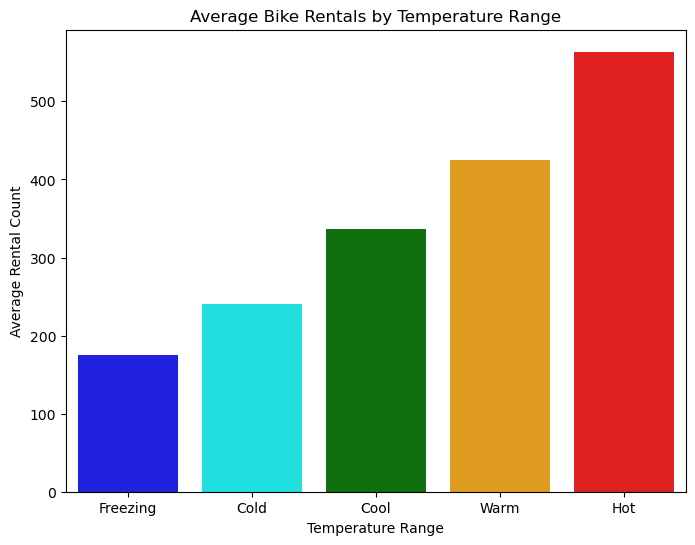

In [995]:
# plot rental means by temperature ranges 
df['temp_range'] = pd.cut(df['temp'], bins=[-15, 0, 10, 20, 30, 40], labels=['Freezing', 'Cold', 'Cool', 'Warm', 'Hot'])

temp_range_rentals = df.groupby('temp_range', observed=True)['count'].mean().reset_index()
color_palette = {
    'Freezing': 'blue',
    'Cold': 'cyan',
    'Cool': 'green',
    'Warm': 'orange',
    'Hot': 'red'
}
plt.figure(figsize=(8, 6))
sns.barplot(x='temp_range', y='count', data=temp_range_rentals, hue='temp_range', palette=color_palette, dodge=False, legend=False)
plt.xlabel("Temperature Range")
plt.ylabel("Average Rental Count")
plt.title("Average Bike Rentals by Temperature Range")
plt.show()

This plot is a clear indicator, that higher temperature leads to higher rentals.

### Linear Regression


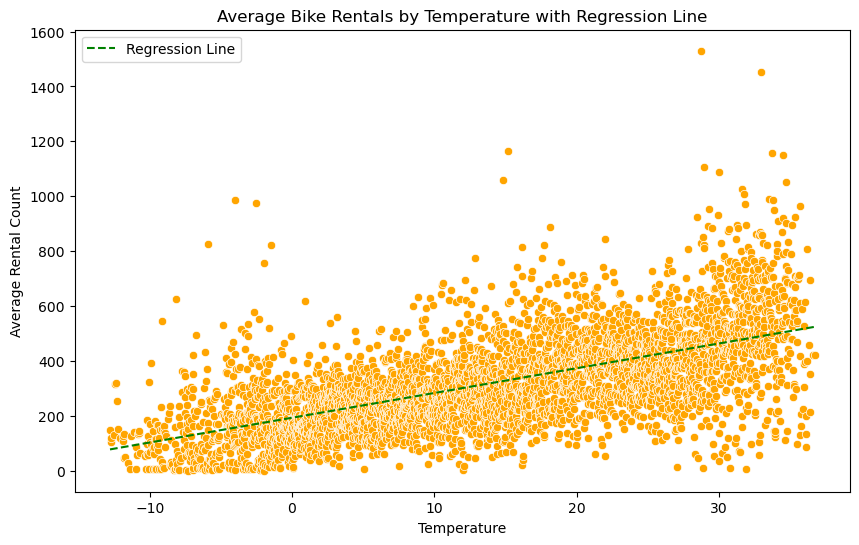

In [1000]:
# linear regression for the scatterplot 'Average Bike Rentals by Temperature'
X = temp_rentals[['temp']]  
y = temp_rentals['count'] 
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=temp_rentals, color='orange')
plt.plot(temp_rentals['temp'], y_pred, color='green', linestyle='--', label='Regression Line')
plt.xlabel("Temperature")
plt.ylabel("Average Rental Count")
plt.title("Average Bike Rentals by Temperature with Regression Line")
plt.legend()
plt.show()

The slope of the regression line is positive, which means there is a correlation between higher temperature and higher bike rentals. The line is not so steep, this means the relationship is weak. 

#### Correlation

In [1005]:
df_corr = df[['count', 'temp', 'humidity', 'wind_speed']]
df_corr_matrix = df_corr.corr()
df_corr_matrix

,count,temp,humidity,wind_speed
count,1.000000,0.292850,-0.091962,0.070869
temp,0.292850,1.000000,0.042754,-0.005834
humidity,-0.091962,0.042754,1.000000,-0.242713
wind_speed,0.070869,-0.005834,-0.242713,1.000000


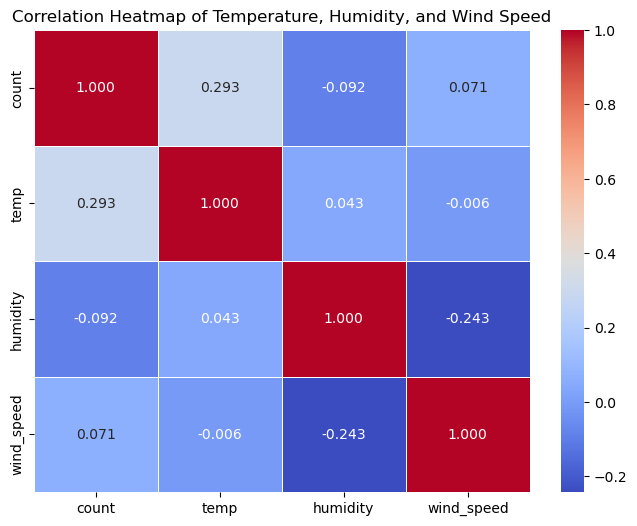

In [1006]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.6)
plt.title("Correlation Heatmap of Temperature, Humidity, and Wind Speed")
plt.show()

I was curious whether the weather attributes have a correlation, and since the slope of the regression line wasn't very steep, I wanted to check the correlation coefficients for temperature and counts. It seems that the correlation between weather and count is not very strong, but it is the strongest overall.

### Summary

1. **What kind of weather conditions (e.g., temperature, humidity) affect bike rentals?**  
   - From my findings, I can confidently say that higher temperatures lead to higher bike rentals. The scatterplot for humidity showed a correlation between low humidity and higher rentals, with a descending trend.

2. **Is there a specific time pattern where bike rentals are higher (e.g., time of day, month, or year)?**  
   - From the plots, it appears that **May**, **June**, **July**, **September**, and **October** are the months with more bike rentals compared to the others. This supports the correlation between temperature and counts, as these months are typically warmer.  
   - Regarding daily patterns, there is no significant difference between the days of the week. **Saturday** has the highest rentals, but the difference is not significant enough to draw strong conclusions. However, **Sunday** shows the lowest bike rentals, which might suggest a slight difference between Saturday and Sunday.

3. **What are the time and weather conditions during rental peaks?**  
   - Looking at the descriptive statistics for the outliers, the average temperature during rental peaks is around **~22ºC**. The mean for working days is approximately **~0.8**, indicating that about 80% of the outliers occurred on working days. However, since there are generally more working days than non-working days, this is not a definitive indicator.  
   - For holidays, the mean is around **~0.004** or **~0.4%**, meaning that the remaining **~20%** of peaks occur on weekends. This suggests that rental peaks mainly occur on weekends or working days, with fewer peaks on holidays. However, further investigation is required to properly analyze these patterns by putting the different types of days in relation to each other for a clearer understanding.


## Self-Reflection

This is my first project in Data Science, so this case study is not very professional, and the conclusions may lack scientific evidence. I chose this dataset because I had a clear approach to tackling it and knew what kind of information I wanted to explore.

I was also interested in the other available datasets (especially the one about social poverty in Brazil), and I even had some ideas of my own, such as analyzing data about chess or poker hands. However, I struggled to develop a clear approach for these datasets and didn't know where or how to start. This dataset felt much easier to work with, but I realize there is still a lot of room for improvement.

For example, I could have divided the data into time frames like "Morning", "Afternoon", "Evening", "Night", and "Late Night". I think this would have been very interesting, but the idea came to me later, and due to time constraints, I couldn't implement it. Additionally, I know I should have looked more into frequencies, especially for the categorical values. A frequency table would have been a valuable improvement, but again, time limitations prevented me from adding it.

I also decided not to create a README file because it would have been somewhat redundant since I explained everything within this notebook.

Overall, I thoroughly enjoyed working on this project. It has sparked my curiosity to learn more about data science and delve deeper into this field.